In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

from tsp_design import normal_tsp, pink_tsp
import soundfile as sf

In [2]:
def sychronous_addition(filename, repeat, N):
    '''
    filename : Name of wav file (str)
    repeat : Number of repetition (int)
    N : Length of input signal (int)
    '''
    data, fs = sf.read(filename)

    # add zeros if length is too short
    if len(data) < repeat * N:
        data = np.r_[data, np.zeros(repeat * N - len(data))]

    mean = np.zeros(N)
    for i in range(repeat):
        mean += data[i * N : (i + 1) * N]
    mean = mean / repeat

    return mean

In [3]:
n = 18
N = 2 ** n
fs = 48000

normal_mean = sychronous_addition('/Users/jin237/Documents/juxtaphony_project/github_japanese/data_set/preliminary_experiments/sample_data/sound/throat.wav', 5, N)
pink_mean = sychronous_addition('/Users/jin237/Documents/juxtaphony_project/github_japanese/data_set/preliminary_experiments/sample_data/sound/conde.wav', 5, N)
normal_tsp, normal_tsp_inv = normal_tsp(n)
normal_tsp_inv_freq = np.fft.fft(normal_tsp_inv)

pink_tsp, pink_tsp_inv = pink_tsp(n)
pink_tsp_inv_freq = np.fft.fft(pink_tsp_inv)

H_normal = np.fft.fft(normal_mean) * normal_tsp_inv_freq
H_pink = np.fft.fft(pink_mean) * pink_tsp_inv_freq

h_normal = np.fft.ifft(H_normal)
h_pink = np.fft.ifft(H_pink)

f = np.linspace(0, fs/2, N//2)

[900. 600.]


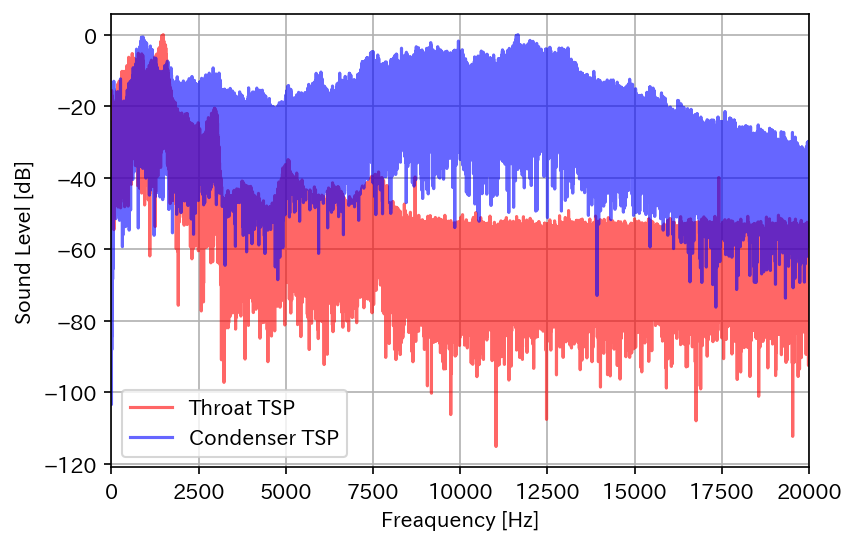

In [4]:
plt.figure(dpi=150)
plt.plot(f[1:], 20*np.log10(np.abs(H_normal[1:N//2])/np.max(np.abs(H_normal))), color="red", label="Throat TSP", alpha=0.6)
plt.plot(f[1:], 20*np.log10(np.abs(H_pink[1:N//2])/np.max(np.abs(H_pink))), color="blue", label="Condenser TSP", alpha=0.6)
plt.xlim(0, 20000)
# plt.title('ThroatとCondenserの周波数特性')
plt.xlabel('Freaquency [Hz]')
plt.ylabel('Sound Level [dB]')
plt.legend()
fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi
print(size)
plt.grid()
plt.savefig('mix_frequency_response_linear.pdf')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[900. 600.]


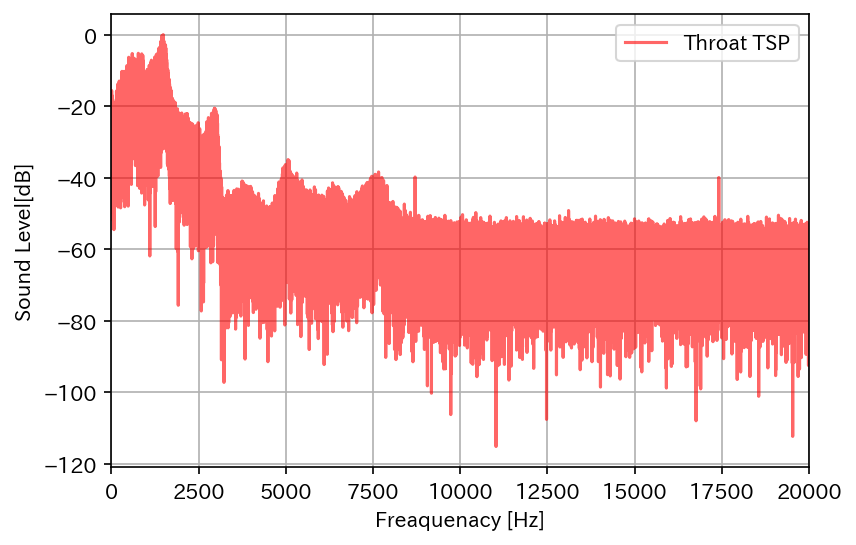

In [23]:
plt.figure(dpi=150)
plt.plot(f[1:], 20*np.log10(np.abs(H_normal[1:N//2])/np.max(np.abs(H_normal))), color="red", label="Throat TSP", alpha=0.6)
plt.xlim(0, 20000)
# plt.title('Throatの周波数特性')
plt.xlabel('Freaquenacy [Hz]')
plt.ylabel('Sound Level[dB]')
plt.legend()
fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi
print(size)
plt.grid()
plt.savefig('throat_frequency_response_linear.eps')
plt.show()

<ipython-input-8-7e7adca42790>:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 50000)


[432. 288.]


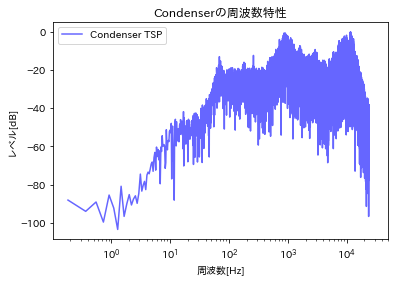

In [8]:
plt.plot(f[1:], 20*np.log10(np.abs(H_pink[1:N//2])/np.max(np.abs(H_pink))), color="blue", label="Condenser TSP", alpha=0.6)
plt.xscale('log')
plt.xlim(0, 50000)
plt.title('Condenserの周波数特性')
plt.xlabel('周波数[Hz]')
plt.ylabel('レベル[dB]')
plt.legend()
fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi
print(size)
plt.savefig('condencer_frequency_response.png')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


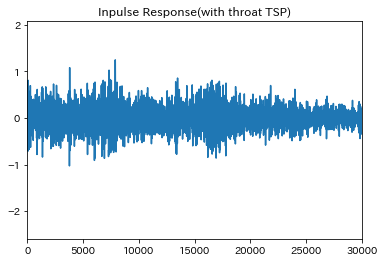

In [50]:
plt.plot(h_normal)
plt.title("Inpulse Response(with throat TSP)")
plt.xlim(0, 30000)
plt.savefig('throat_inpulse_response_tsp.png')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


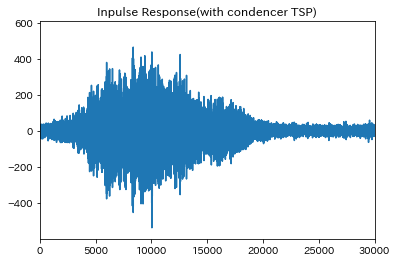

In [49]:
plt.plot(h_pink)
plt.title("Inpulse Response(with condencer TSP)")
plt.xlim(0, 30000)
plt.savefig('condencer_inpulse_response_tsp.png')
plt.show()